# Project: Build a Digit Recognition Program

## Project Overview

In this project, you will use logistic regression, deep neural networks, and convolutional neural networks to create a digit recognition deep learning system. First, you will implement the digit recognition system using a simple logistic regression multiclass classifier.  Afterwards, the model will be upgraded using a deep neural network.  Finally, the digits will be recognized using a CNN and performance will be compared among the various implementations. The dataset used will be the MNIST dataset, and the deep learning framework to implement the algorithms will be TensorFlow. 

### Logistic Regression

In [73]:
#import various functions to be used throghout the project
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

#import tensorflow framework as well as the MNIST dataset
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import pandas as pd

import math
import os
import pylab
%matplotlib inline

In [4]:
#reset the Tensorflow graph and begin a new session
tf.reset_default_graph()
sess = tf.Session()


In [5]:
#read in the MNIST data 
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

print ('cell finished')

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
cell finished


Train, validation, test: 55000, 5000, 10000
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
3
784


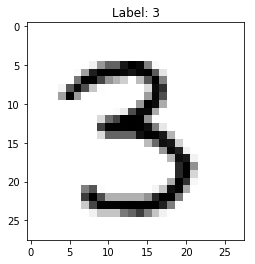

In [37]:


# 1. There are 55k, 5k, and 10k examples in train, validation, and test.
print ('Train, validation, test: %d, %d, %d' % 
      (len(mnist.train.images), len(mnist.validation.images), len(mnist.test.images)))

# show how the labels are represented using one-hot encoding
# This is represented as '[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]'
print (mnist.train.labels[4])

# You can find the index of the label, like this:
print (np.argmax(mnist.train.labels[4]))

# 3. An image is a 'flattened' array of 28*28 = 784 pixels.
print (len(mnist.train.images[4]))

# 4. To display an image, first reshape it to 28x28.
pylab.imshow(mnist.train.images[4].reshape((28,28)), cmap=pylab.cm.gray_r)   
pylab.title('Label: %d' % np.argmax(mnist.train.labels[4])) 

In [38]:
#define various constants to be used in training the model
NUM_CLASSES = 10
NUM_PIXELS = 28 * 28
BATCH_SIZE = 100
LEARNING_RATE = 0.5
EPOCHS = 2000


In [39]:
# Define input variables

#the input x will be an image
x = tf.placeholder(tf.float32, [None,28*28])

#the output y will be a one-hot encoded array with a 1 located at the location of the predicted output
y_ = tf.placeholder(tf.float32, [None, 10])

#define the weight matrix to be multiplied by the input, normalize bias to an array of 0's
W = tf.Variable(tf.truncated_normal([28*28,10], stddev=0.1))
b = tf.Variable(tf.zeros([10]))

In [40]:
# Define the matrix multiplication and bias add

y = tf.matmul(x,W) + b

In [41]:
# Define loss using softmax, cross entropy and logits
# let's first use a gradient descent optimizer

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)



In [42]:
# This cell creates the session and initializes all of the variables

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

calculated label = 9 expected label = 1


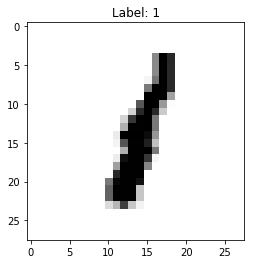

In [43]:
# Let's try the model before we train it to see what happens. Since the weights are random, there is a small chance
# that it may work, but if you try different image indices by changing the image_index value below, you will see 
# that most of the images are miscategorized. Try a few values. The range of allowed values is from 0 to 4999.
# Hit shift-enter to run the cell again and recalculate the value

# You will re-run this cell again after the model is trained and see the difference

image_index = 89
exp_label = np.argmax(mnist.test.labels[image_index], 0)
x_image = np.reshape(mnist.test.images[image_index], [-1,784])


outval = sess.run(y, feed_dict={x:x_image})
#this is weird, outval[0] refers to a 1x10 Tensor so the 0 is referring to that 1 part of the dimension
label= np.argmax(outval[0],0)

print ("calculated label = {} expected label = {}".format(label, exp_label))
pylab.imshow(mnist.test.images[image_index].reshape((28,28)), cmap=pylab.cm.gray_r)   
pylab.title('Label: %d' % np.argmax(mnist.test.labels[image_index])) 

In [44]:
#  
for t in range(EPOCHS):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
  if t%100 == 0:
    print('train_step = {}'.format(t))

train_step = 0
train_step = 100
train_step = 200
train_step = 300
train_step = 400
train_step = 500
train_step = 600
train_step = 700
train_step = 800
train_step = 900
train_step = 1000
train_step = 1100
train_step = 1200
train_step = 1300
train_step = 1400
train_step = 1500
train_step = 1600
train_step = 1700
train_step = 1800
train_step = 1900


In [45]:
# Write the code to evaluate the model as we saw in the lecture

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("Training Accuracy: ", sess.run(accuracy, feed_dict={x:mnist.train.images, y_:mnist.train.labels}))
print("Testing Accuracy: ",sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels}))

Training Accuracy:  0.922109
Testing Accuracy:  0.9215


It looks like logistic regression does a decent job at correctly classifying the test images in the MNIST dataset.  Let's see if we can improve on this model by integrating deeper neural networks. 

### Deep Neural Networks

In [47]:
#let's reset the graph and begin a new TF session
tf.reset_default_graph()
sess = tf.Session()

In [48]:
# Define input placeholders 
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

In [49]:
# Define a neural network with multiple layers
#use the ReLU for the activation function

l1w = tf.Variable(tf.truncated_normal([784,500], stddev=0.1))
l1b = tf.Variable(tf.constant(0.1,shape=[500]))
l1actv = tf.nn.relu(tf.matmul(x,l1w)+ l1b)

l2w = tf.Variable(tf.truncated_normal([500,10], stddev=0.1))
l2b = tf.Variable(tf.constant(0.1,shape=[10]))

y = tf.matmul(l1actv,l2w) + l2b

In [50]:
#define an error function that reduced the mean error
#in this case, let's use the AdamOptimizer rather than the generic Gradient Descent
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y))

train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

In [51]:
# Call the global variables initializer

sess.run(tf.global_variables_initializer())

In [52]:
# Write the loop to train the new DNN model

for t in range(2000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
  if t%100 == 0:
    print('train_step = {}'.format(t))

train_step = 0
train_step = 100
train_step = 200
train_step = 300
train_step = 400
train_step = 500
train_step = 600
train_step = 700
train_step = 800
train_step = 900
train_step = 1000
train_step = 1100
train_step = 1200
train_step = 1300
train_step = 1400
train_step = 1500
train_step = 1600
train_step = 1700
train_step = 1800
train_step = 1900


In [53]:
# Model Evaluation

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("Training Accuracy: ", sess.run(accuracy, feed_dict={x:mnist.train.images, y_:mnist.train.labels}))
print("Testing Accuracy: ",sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels}))

Training Accuracy:  0.991636
Testing Accuracy:  0.9777


It looks like simply adding an additional hidden layer increased the accuracy of our model from 92.15% to 97.78%.  Lets see if we can squeeze even more accuracy out of this by integrating a convolutional neural network. 

### Convolutional Neural Network

In [54]:
#let's reset the graph and begin a new TF session
tf.reset_default_graph()
sess = tf.Session()

In [55]:
x = tf.placeholder(tf.float32, [None,784])
y_ = tf.placeholder(tf.float32, [None, 10])

In [56]:
#lets use functions to define the weight and bias variables in this case.
#There will be a large amount of variables to define so this will make it easier
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

The convolution and pooling layer parameters will be nearly the same except for the shapes, so we can wrap these in functions as well to provide consistency. We will use a stride of 1 for the conv2d layers with padding equal to SAME. With these settings the output size will be same as the input. The pooling layer will use a pooling of 2 so that the output image is 1/2 the size of the input.


In [58]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')

In [59]:
#define the weights and bias for the first layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])


In [60]:
#reshape the input image from a 1-d array of 784 pixel values
#into a 28 x 28 pixel 2-d array
x_image = tf.reshape(x, [-1,28,28,1])


In [61]:
#define our first convolutional and pooling layers
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)


In [62]:
#repeat the above process for the next layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


Next, let's create the weight variable and bias variable for the first fully connected layer. The weight variable needs to match the size of the final convolutional layer so it needs to have 7 by 7 by 64 inputs and 1024 outputs. The bias variable needs to have a bias value for each of the 1024 output neurons. 

In [64]:
#define our fully connected layer

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

The output of the second pooling layer is 64 filters of 7 x 7. The first fully connected layer will consist of 1024 neurons whose inputs are the outputs of the second pooling layer. Since the pooling layer output is 2d, it will need to be reshaped into single dimensional vectors for input to the fully connected layer.

After the reshape the fully connected layer takes the weights, biases, and reshaped input and performs a matrix multiply, add, and relu function.

In [65]:
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [66]:
#use dropout to increase the chances the network generalizes more quickly
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

Let's create our final convolutional layer and define a matrix multiplication output.  The output of this will be used to predict the digit. 

In [67]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2


In [68]:
#define error function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))


In [69]:
#train the model using the AdamOptimizer method
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)


In [70]:
#metrics for model evaluation
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [71]:
#initialize a new session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [72]:
#CNNs typically need more iterations to train with a lower learning rate in comparison to shallower DNNs
#these numbers were determined simply by a trial and error process
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        #print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

Finally, after training the CNN for 20,000 iterations, lets checkout the accuracy of the convolutional layer to see if we were able improve on our deep neural network model. 

In [76]:
print("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
print("training accuracy %g"%accuracy.eval(feed_dict={x: mnist.train.images, y_: mnist.train.labels, keep_prob: 1.0}))


test accuracy 0.9927
training accuracy 0.999727


## Results Comparison

It looks like there are major improvements from implementing the digit recognition system going from logistic regression, to deep neural networks, and finally to convolutional neural networks. The training and testing accuracies are summarized in the table below:

In [77]:
results_data = {'Logistic Regression': [0.922, 0.9215], 'DNN': [0.9916, 0.9777], 'CNN': [0.9997,0.9927]}
results_data_df = pd.DataFrame(results_data)

In [84]:
results_data_df.rename(index={0:'Training Accuracy', 1:'Testing Accuracy'})

,CNN,DNN,Logistic Regression
Training Accuracy,0.9997,0.9916,0.9220
Testing Accuracy,0.9927,0.9777,0.9215


Testing accuracy is the more important metric in this case and it seems that CNN outperforms the other models.  Though all models seem to have a high accuracy, a 1-2% increase in testing accuracy can be massively important depending on the applications of the digit recognition classifier.  For example, if this applications was integrated into a self-driving vehicle that was reading road signs, a system with 92% accuracy would not be acceptable by any standard.  With more sophisticated models, near-perfect accuracy becomes a posssibility.  This of course comes at a great cost